#Collaborative Statistical Mechanics Notebook

##Made by Himanshu Singh and Piyush R. Maharana

To Make changes in a code please just make a new cell below the code without editing from the original cell and in that cell you can copy the original code and make changes to it just mention it in the comments that its the edited edited code. I would also recommend to keep your original work saved in your personal computers.

                                                                            --Himanshu Singh

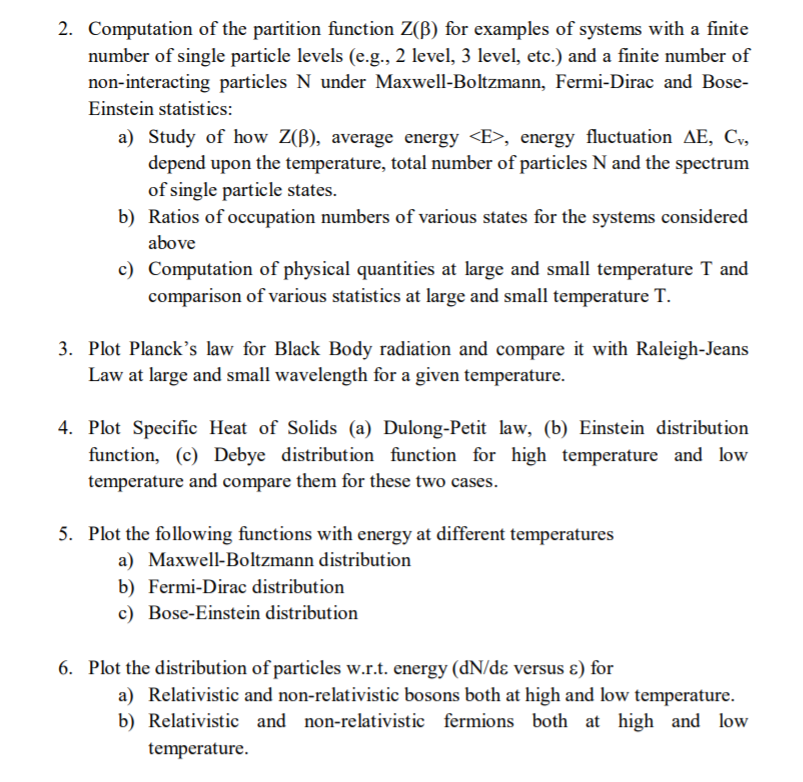



```
# This is formatted as code
```

# Lennard Jonnes: N interacting particles


In [ ]:
# A single box seperated by a wall,the distribution after a time
# No LJ potential but still yeah
import numpy as np
import matplotlib.pyplot as plt
N = 50         # Number of particles
nstep = 2000    # Number of steps
n = np.zeros(nstep)
n[0] = 1 # Initial number on left side
for i in range(1,nstep):
    r = np.random.rand(1)
    if (r<n[i-1]/N):
        n[i] = n[i-1] - 1 # Move atom from left to right
    else:
        n[i] = n[i-1] + 1 # Move atom from right to left

plt.figure(figsize=(11,8))
plt.subplot(2,1,1)
plt.plot(range(0,nstep),n/N,label=N)
plt.axhline(0.5, color='grey',linestyle='--',linewidth=2)
plt.xlabel('t',fontsize=15)
plt.ylabel('n/N',fontsize=15)
plt.ylim([0,1])
plt.legend()
plt.figure(figsize=(11,8))
plt.subplot(2,1,2)
N2 = 1000         # Number of particles
nstep = 2000    # Number of steps
v = np.zeros(nstep)
v[0] = 50 # Initial number on left side
for i in range(1,nstep):
    r = np.random.rand(1)
    if (r<v[i-1]/N2):
        v[i] = v[i-1] - 1 # Move atom from left to right
    else:
        v[i] = v[i-1] + 1 # Move atom from right to left
        
plt.plot(range(0,nstep),v/N2,color='red',label=N2)
plt.axhline(0.5, color='grey',linestyle='--',linewidth=2)
#xlabel(’t’),ylabel(’n/N’)
plt.xlabel('t',fontsize=15)
plt.ylabel('n/N',fontsize=15)
plt.ylim([0,1])
plt.legend()
plt.show()

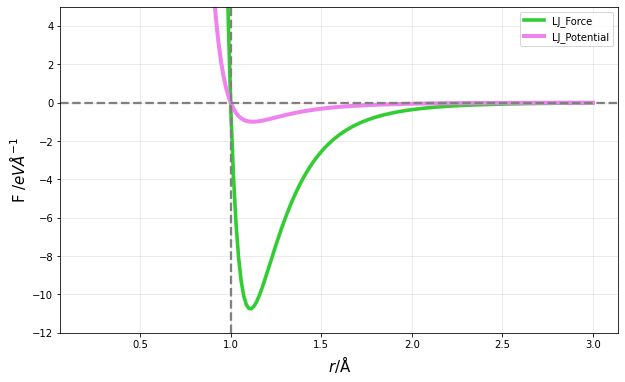

In [ ]:
# Just the LJ potential but the force is here
import numpy as np
import matplotlib.pyplot as plt
def lj_force(r, epsilon, sigma):
    return 48 * epsilon * np.power(sigma, 12) / np.power(r, 13) - 48 * epsilon * np.power(sigma, 6) / np.power(r, 7)

def lj_potential(r, epsilon, sigma):               
    epsilon = 1                                     # Energy minimum,well depth
    sigma = 1                                       # Distance to zero potential
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)   # Lennard-Jones potential

r = np.linspace(0.2, 3, 200)

plt.figure(figsize=(10,6))
plt.plot(r, lj_force(r, 1, 1),color='limegreen',label='LJ_Force',lw=3.6)
plt.plot(r, lj_potential(r,1,1),color='violet',label='LJ_Potential',lw=4)
plt.xlabel(r'$r$/Å',fontsize=15)
plt.ylabel('F /$eVÅ^{-1}$',fontsize=15)
plt.ylim([-12,5])
plt.axhline(0, color='grey',linestyle='--',linewidth=2.3)
plt.axvline(1, color='grey',linestyle='--',linewidth=2.3)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

#Heat Capacity Models in Poor Conductors



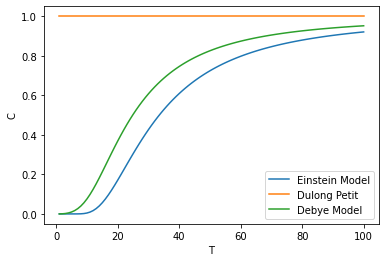

In [ ]:
### heat capacity models
###
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import quad
T_e=np.float_(100.00)
def dulong(T):
    return [1]*len(T)

def einstein(T,T_e):
    return ((T_e/T)**2)*(np.exp(T_e/T)/(np.exp(T_e/T)-1)**2)
def debyeint(x):
    #print(np.exp(x))
    return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)

def debye(T,T_d):  
    deby=list()
    for t in T:
        deby.append(3*((t/T_d)**3) *np.float_(quad(debyeint,0,T_d/t)[0]))
    return (np.array(deby))

T=np.linspace(1,100, 100)

eins=einstein(T,T_e)
plt.plot( T, eins, label='Einstein Model')
plt.plot( T, dulong(T), label='Dulong Petit')
plt.plot( T, debye(T, T_e), label='Debye Model')
plt.xlabel("T")
plt.ylabel("C")
plt.legend()
plt.show()



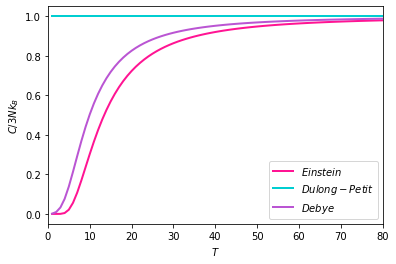

In [ ]:
# The Heat capacities but after they went to art class
from scipy.integrate import quad   # For quad integration
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

N=1
#Temperatures
T=np.linspace(1,100, 100)
T_e=np.float_(40.10)      #Einstein Temperature
T_d=np.float_(40.00)       #Debye Temperature

def Dulong(T):
    return [1]*len(T)    #Dulong Petit Law C_v=3NK_B;We have normalised it so this is 1.
        
def Einstein(T,T_e):
    return ((T_e/T)**2)*(np.exp(T_e/T)/(np.exp(T_e/T)-1)**2)
#Defining the function for the integral in Debye function
def thatintegralindebye(x):
    return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)    #Defining the function for the integral in Debye
                                                    #Formula 

#Using scipy to integrate the integral and
def Debye(T,T_d):  
    deby=list()
    for t in T:
        deby.append(3*((t/T_d)**3) *np.float_(quad(thatintegralindebye,0,T_d/t)[0]))
    return (np.array(deby))

eins=Einstein(T,T_e)
plt.plot( T, eins, label='$Einstein$',color='deeppink',linewidth=2)
plt.plot( T, Dulong(T), label='$Dulong-Petit$',color='darkturquoise',linewidth=2)
plt.plot( T, Debye(T,T_d), label='$Debye$',color='mediumorchid',linewidth=2)
#plt.axvline(x=T_e,label='$T_e$',color='skyblue')
#plt.axvline(x=T_d,label='$T_d$',color='limegreen')
plt.xlim([0,80])
plt.xlabel("$T$")
plt.ylabel("$C/3N k_B$")
plt.legend()
plt.show()

#Classical and Quantum Disributions

In [ ]:
i

##Fermi Dirac Distribution

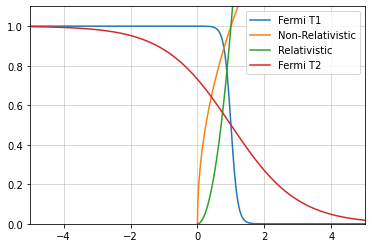

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
k=1
t1=0.1  
t2=1
#t2=50 #if you want to get the staright line is distribution
C=1
mu=1
E = np.linspace(-10,10,500);
Fermi = 1.0/(np.exp((E-mu)/(k*t1))+1); #mind the brackets np.exp((E-mu)/k*t1) will evaluate as exp(((E-mu)/k)*t1) which is not we deisre
#Fermi = 1.0/(np.exp((E-mu)*np.inf/(k))+1) # for almost perfect 0k distribution
E1 = np.linspace(0,3,500);
DOS=C*(E1)**(0.5)
DOS1=C*(E1)**(2)
Fermi1 = 1.0/(np.exp((E-mu)/(k*t2))+1);
plt.plot(E,Fermi,label='Fermi T1')
plt.plot(E1,DOS,label='Non-Relativistic')
plt.plot(E1,DOS1,label='Relativistic')
plt.plot(E,Fermi1,label='Fermi T2')
plt.legend()
plt.ylim([0,1.1])
plt.xlim([-5,5])
plt.grid(alpha=0.6)
plt.show()

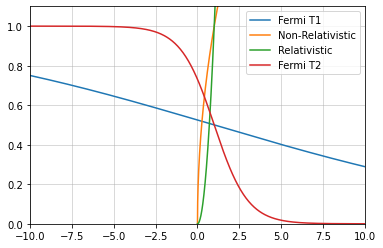

In [ ]:
)##i just copy pasted the original code just for reference

import numpy as np
import matplotlib.pyplot as plt
k=1
t1=0.1  
t2=1
C=1
mu=1
E = np.linspace(-10,10,500);
Fermi = 1.0/(np.exp((E-mu)/k*t1)+1);
E1 = np.linspace(0,3,500);
DOS=C*(E1)**(0.5)
DOS1=C*(E1)**(2)
Fermi1 = 1.0/(np.exp((E-mu)/k*t2)+1);
plt.plot(E,Fermi,label='Fermi T1')
plt.plot(E1,DOS,label='Non-Relativistic')
plt.plot(E1,DOS1,label='Relativistic')
plt.plot(E,Fermi1,label='Fermi T2')
plt.legend()
plt.ylim([0,1.1])
plt.xlim([-10,10])
plt.grid(alpha=0.6)
plt.show()

#Parition Functions and all the other good stuff

##Calculation Of Partition Function


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
k=1.0  #value

def Z_elem(T,E_vec):     
    z=list()
    for E in E_vec:    #check to see if vectorization is possible instead of a for loop
        z.append(np.exp(-E/(k*T)))  # putting each of the terms of the Z
    return np.array(z)

def Z_fn(T,E_vec):
    z=np.sum(Z_elem(T,E_vec))  #Summing up the terms to obtain the partition function
    return z


##Calculation of Other Quantities Using Z

$$P_r=\frac{exp(\frac{E_r}{k_bT})}{Z}$$\
$$S=-k\left<ln P_r\right>=-k\sum_r P_rln P_r $$


In [ ]:
def F(Z,T):    
    return(-k*T*np.log(Z))
 
def _E_(Z_elem,E_vec):    #Calculating the Average energy
    U_elem=[Z*E for (Z,E) in (Z_elem,E)]  
    U_elem=U_elem/np.sum(Z_elem)    
    return np.sum(U_elem)
 
def S(Z_elem):       
    s=0
    z_fn=np.sum(Z_elem)
    for Z in Z_elem:  #list comprehension wouldn't work in the way i thought              
      s-=k*(Z/z_fn)*np.log(Z/z_fn) #Thanks to Piyush for pointing that out
    return s
 
def derivative(vec,f_vec):
    if len(vec)!=len(f_vec):
        print("The length of field and function vector are not equal") 
        quit()   
    h=f_vec[1]-f_vec[0]
    d=list()
    d.append((vec[1]-vec[0])/h)
    for i in range(1,len(vec)-1):
        d.append((vec[i+1]-vec[i-1])/h)
    d.append((vec[-1]-vec[len(vec)-1])/h)
    return np.array(d)

##Plotting Our Results

In [ ]:
T=np.linspace(0.1,10 ,1000)
E=np.array([0,1])
ZvT=list()
AvT=list()#A is helmholtz
UvT=list()
SvT=list()
for t in T:
    ZvT.append(Z_fn(t,E))
    AvT.append(F(ZvT[-1],t))
    z=Z_elem(t,E)
    UvT.append(_E_(z,E))
    SvT.append(S(z))

Z=np.array(ZvT)

C_v=derivative(UvT,T)



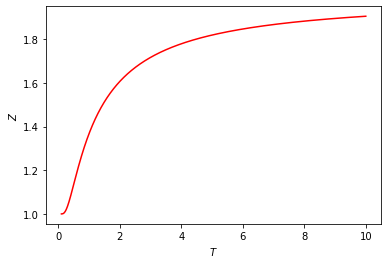

In [ ]:
plt.plot(T,Z,'r')
plt.ylabel("$Z$")
plt.xlabel("$T$ ")
plt.show()

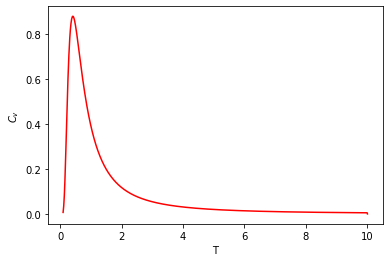

In [ ]:
plt.plot(T,C_v,'r')
plt.ylabel("$C_v$")
plt.xlabel("T")
plt.show()

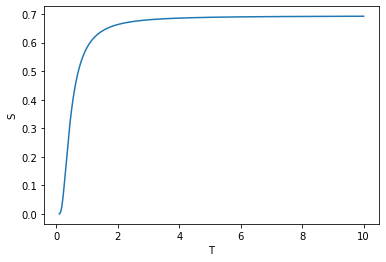

In [ ]:
plt.plot(T,SvT)
plt.ylabel("S")
plt.xlabel("T")
plt.show()

#Planck's Law for Blackbody Radiation

##Planck's law 
$$S=\frac{8\pi hc}{\lambda^5}\frac{1}{exp(hc/\lambda kT)-1}$$

##Spectral radiance 
$$ {\color{Red}B_{\lambda}(\lambda,T)=\frac{2hc^2}{\lambda^5}\frac{1}{exp(hc/\lambda kT)-1}}$$
##Rayleigh Jeans law
$$S=\frac{2ckT}{\lambda^4}$$

##Rayleigh Jeans 
$${\color{Red} B_{\lambda}(T)=\frac{2ckT}{\lambda^4}}$$

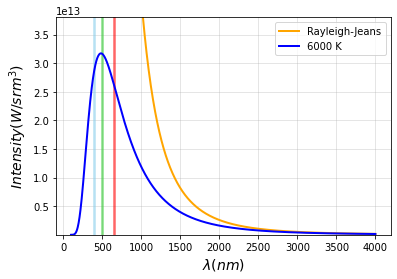

In [ ]:
#
import numpy as np
import matplotlib.pyplot as plt
 
wavelength_nm = np.linspace(100,4000,1000)  
wavelength_m  = wavelength_nm*1e-9          
  
#Constants
h=6.626e-34 
c=3.0e+8
k=1.38e-23
 
def planck(T):
    a=2.0*h*c**2
    b=h*c/(wavelength_m*k*T)
    return a/ ((wavelength_m**5)*(np.exp(b)-1.0))
 
T=5000
RJ_intensity = 2*c*k*T/wavelength_m**4
 
plt.ylim(1e8,0.38e14)
plt.xlabel('$\lambda(nm)$',fontsize=14)   #How do these Latex labels look bro!
plt.ylabel('$Intensity (W/sr m^3)$',fontsize=14)
# Putting up these Lines just to visulaize the visual spectrum
plt.axvline(x=400,color='skyblue',alpha=0.6,lw=2.5)
plt.axvline(x=650,color='red',alpha=0.6,lw=2.5)
plt.axvline(x=500,color='limegreen',alpha=0.6,lw=2.5)
 
plt.plot(wavelength_nm,RJ_intensity,linewidth=2.0,color='orange',label='Rayleigh-Jeans')
plt.plot(wavelength_nm,planck(6000),linewidth=2.0,color='blue',label='6000 K')
#plt.plot(wavelength_nm,planck(5000),linewidth=2.0,label='5000 K')
plt.legend(loc='upper right')
plt.grid(alpha=0.4)
plt.show()